In [2]:
%matplotlib inline
import keras
import os
import numpy as np
import pickle
import milsed
import imp
import jams
import matplotlib.pyplot as plt
import librosa.display
import pumpp

Using TensorFlow backend.


In [3]:
train = imp.load_source('train', '/home/js7561/dev/milsed/models/02_train.py')

In [4]:
pump = pickle.load(open('/home/js7561/dev/milsed/models/resources/pump.pkl', 'rb'))

In [6]:
model, inputs, outputs = train.MODELS['crnn1d_smp'](pump, 1.0)

In [7]:
model.load_weights('/home/js7561/dev/milsed/models/resources/1472829.0/model.h5')

In [8]:
fid = 'Y-zxrdL6MlKI_30.000_40.000'

In [9]:
audiofolder = '/beegfs/js7561/datasets/dcase2017/task4_official/combined/audio_silence/'
pumpfolder = '/beegfs/js7561/datasets/dcase2017/task4_official/combined/features_silence/'

jamfile = os.path.join(audiofolder, fid + '.jams')
pumpfile = os.path.join(pumpfolder, fid + '.h5')
jam = jams.load(jamfile)
datum = milsed.utils.load_h5(pumpfile)['mel/mag']

In [10]:
datum.shape

(1, 430, 128, 1)

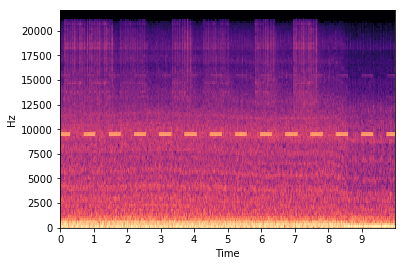

In [9]:
librosa.display.specshow(datum.reshape((430,128)).T, sr=44100, hop_length=1024, x_axis='time', y_axis='linear')

In [11]:
output_d, output_s = model.predict(datum)

In [12]:
output_s

array([[  8.33046716e-03,   9.39562015e-05,   3.30581293e-02,
          1.72454312e-01,   4.35047626e-01,   4.06724354e-03,
          5.53220659e-02,   5.26259700e-03,   5.75517362e-04,
          1.95965376e-02,   2.69284681e-03,   1.32951317e-02,
          1.49933068e-04,   4.99318645e-04,   2.73757279e-02,
          2.45169550e-03,   1.17265232e-01]], dtype=float32)

In [13]:
output_s.shape

(1, 17)

In [14]:
output_d.shape

(1, 430, 17)

In [14]:
dlabel = milsed.utils.load_h5(pumpfile)['static/tags']

In [15]:
dlabel

array([[False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False,  True]], dtype=bool)

In [16]:
np.where(dlabel==True)

(array([0, 0]), array([11, 16]))

In [17]:
np.where(output_s>=0.5)

(array([0]), array([4]))

In [18]:
static_transformer = pump['static']

In [19]:
static_transformer.encoder.classes_

array(['Air horn, truck horn', 'Ambulance (siren)', 'Bicycle', 'Bus',
       'Car', 'Car alarm', 'Car passing by', 'Civil defense siren',
       'Fire engine, fire truck (siren)', 'Motorcycle',
       'Police car (siren)', 'Reversing beeps', 'Screaming', 'Skateboard',
       'Train', 'Train horn', 'Truck'], dtype=object)

In [20]:
hot = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
print(hot.shape)
static_transformer.encoder.inverse_transform(hot)

(1, 17)


[('Air horn, truck horn',)]

In [21]:
static_transformer.encoder.classes_.shape

(17,)

In [22]:
static_transformer.encoder.transform([('Air horn, truck horn', )])

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [23]:
for c in static_transformer.encoder.classes_:
    print(static_transformer.encoder.transform([(c,)])[0], c)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] Air horn, truck horn
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] Ambulance (siren)
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] Bicycle
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] Bus
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] Car
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] Car alarm
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] Car passing by
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] Civil defense siren
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] Fire engine, fire truck (siren)
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0] Motorcycle
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0] Police car (siren)
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0] Reversing beeps
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0] Screaming
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0] Skateboard
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0] Train
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0] Train horn
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] Truck


In [24]:
# output_s = output_s[0]
# output_d = output_d[0]
# print(output_d.shape)
# print(output_s.shape)

In [25]:
ann_s = pump['static'].inverse(output_s, duration=10.0)

In [26]:
ann_s

,time,duration,value,confidence
0,0.000,10.000,Car,None


In [27]:
output_s

array([[  2.95368285e-04,   7.35685753e-05,   4.61946800e-03,
          2.17573885e-02,   7.95550883e-01,   1.07699528e-03,
          6.26040697e-02,   4.43417579e-04,   8.54687998e-04,
          2.48949025e-02,   3.30613600e-03,   3.14189261e-03,
          1.07744898e-04,   5.04045965e-05,   4.07799846e-03,
          1.67910141e-04,   7.11197853e-02]], dtype=float32)

In [28]:
DCASE_CLASSES = ['Air horn, truck horn',
                 'Ambulance (siren)',
                 'Bicycle',
                 'Bus',
                 'Car',
                 'Car alarm',
                 'Car passing by',
                 'Civil defense siren',
                 'Fire engine, fire truck (siren)',
                 'Motorcycle',
                 'Police car (siren)',
                 'Reversing beeps',
                 'Screaming',
                 'Skateboard',
                 'Train',
                 'Train horn',
                 'Truck']

In [29]:
dynamic_transformer = pumpp.task.DynamicLabelTransformer(name='dynamic', namespace='tag_open', labels=DCASE_CLASSES)

In [30]:
dynamic_transformer.inverse(output_d, duration=10.0)

,time,duration,value,confidence


In [31]:
np.where(output_d >= 0.5)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
output_d.shape

(1, 430, 17)

In [33]:
output_d[0, 10:20, :]

array([[  1.63358205e-03,   8.39082204e-05,   6.48744544e-03,
          1.58200916e-02,   7.43405581e-01,   6.70751848e-04,
          1.01707913e-01,   2.08447897e-03,   1.86464924e-03,
          8.84142071e-02,   3.34762223e-03,   5.15202899e-03,
          1.81988144e-05,   9.21102037e-05,   1.09881498e-02,
          1.12365269e-04,   4.77341600e-02],
       [  6.39474136e-04,   6.77812423e-05,   5.31430449e-03,
          2.11793147e-02,   7.87802696e-01,   5.08765981e-04,
          9.79662240e-02,   1.48538419e-03,   9.31616931e-04,
          8.25998411e-02,   3.39054177e-03,   3.11720674e-03,
          2.51656875e-05,   6.04592205e-05,   1.13741904e-02,
          7.27591541e-05,   4.22294661e-02],
       [  5.50439814e-04,   6.16588368e-05,   5.09979390e-03,
          2.31439173e-02,   7.60639727e-01,   3.24180466e-04,
          9.49588120e-02,   1.49882620e-03,   8.18416593e-04,
          6.70055002e-02,   2.37382413e-03,   3.15750297e-03,
          2.55062168e-05,   4.91667779e-05

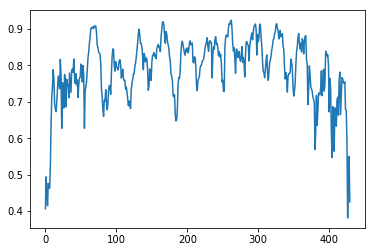

In [34]:
plt.plot(output_d[0, :, 4])

In [35]:
dynamic_transformer.inverse(output_d[0], duration=10.0)

,time,duration,value,confidence
0,0.163,9.729,Car,None
1,9.915,0.046,Car,None


In [36]:
output_s.shape

(1, 17)

In [37]:
static_transformer.inverse(output_s[0], duration=10.0)

,time,duration,value,confidence
0,0.000,10.000,Car,None


In [38]:
static_transformer.encoder.classes_ == DCASE_CLASSES

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [39]:
# static_transformer.encoder.classes_?

In [40]:
dlabel_trans = pumpp.task.DynamicLabelTransformer(
    name='dynamic', namespace='tag_open', labels=static_transformer.encoder.classes_)

In [41]:
dlabel_trans.encoder = static_transformer.encoder

In [42]:
ann_d = dlabel_trans.inverse(output_d[0], duration=10.0)

In [43]:
ann_d

,time,duration,value,confidence
0,0.163,9.729,Car,None
1,9.915,0.046,Car,None


In [44]:
static_transformer.inverse(output_s[0], duration=10.0)

,time,duration,value,confidence
0,0.000,10.000,Car,None


In [45]:
ann_s

,time,duration,value,confidence
0,0.000,10.000,Car,None


In [46]:
import sklearn

In [47]:
fake_pred = np.array([[1, 0, 0], [0, 1, 0]])
fake_true = np.array([[1, 0, 0], [1, 0, 0]])

In [48]:
sklearn.metrics.f1_score(fake_true, fake_pred, average='micro')

0.5

In [49]:
sklearn.metrics.f1_score(fake_true, fake_pred, average='macro')

/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.22222222222222221

In [50]:
sklearn.metrics.f1_score(fake_true, fake_pred, average='weighted')

/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.66666666666666663

In [51]:
sklearn.metrics.f1_score(fake_true, fake_pred, average='samples')

0.5

In [52]:
dpump = milsed.utils.load_h5(pumpfile)

In [53]:
dpump.keys()

dict_keys(['mel/mag', 'static/_valid', 'static/tags'])

In [54]:
dpump['static/tags'].shape

(1, 17)

In [55]:
dpump['static/_valid']

array([[ 0, 10]])

In [56]:
a = []
a.append(dpump['static/tags'][0])
a.append(dpump['static/tags'][0])
a = np.array(a)

In [57]:
a.shape

(2, 17)

In [58]:
a

array([[False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False,  True]], dtype=bool)

In [59]:
dy, sta = model.predict(datum)

In [60]:
dy.shape

(1, 430, 17)

In [61]:
sta.shape

(1, 17)

In [62]:
datum[0].shape

(430, 128, 1)

In [63]:
pump['static'].inverse(sta[0], duration=10.0)

,time,duration,value,confidence
0,0.000,10.000,Car,None


In [64]:
sklearn.metrics.f1_score([1, 0, 0], [1, 0, 0])

1.0

## sed_eval metrics

In [65]:
import sed_eval
import pandas as pd

In [66]:
segmetrics = sed_eval.sound_event.SegmentBasedMetrics(DCASE_CLASSES, time_resolution=1.0)

In [67]:
ref_list = pd.DataFrame([[0, 1, 'yes'], [1, 2, 'no']])
est_list = pd.DataFrame([[0, 1, 'yes']])

In [68]:
ref_list

,0,1,2
0,0,1,yes
1,1,2,no


In [69]:
est_list

,0,1,2
0,0,1,yes


In [70]:
ref_list.to_csv('ref_list.csv', header=False, index=False)
est_list.to_csv('est_list.csv', header=False, index=False)

In [71]:
ref_list_sed = sed_eval.io.load_event_list('ref_list.csv')

In [72]:
ref_list_sed

[{'event_label': 'yes', 'event_offset': 1.0, 'event_onset': 0.0},
 {'event_label': 'no', 'event_offset': 2.0, 'event_onset': 1.0}]

In [73]:
type(ref_list_sed)

sed_eval.util.event_list.EventList

In [74]:
type(ref_list_sed[0])

dict

In [75]:
elist = sed_eval.util.event_list.EventList([{'event_label': 'yes', 'event_offset': 1.0, 'event_onset': 0.0},
 {'event_label': 'no', 'event_offset': 2.0, 'event_onset': 1.0}])

In [76]:
elist

[{'event_label': 'yes', 'event_offset': 1.0, 'event_onset': 0.0},
 {'event_label': 'no', 'event_offset': 2.0, 'event_onset': 1.0}]

In [77]:
ann_s.annotation_metadata.version = '5'

In [78]:
ann_s.annotation_metadata.annotator = 'weak'

In [79]:
ann_s.annotation_metadata

<AnnotationMetadata(annotator='weak',
                    version='5',
                    corpus='',
                    curator=<Curator(...)>,
                    annotation_tools='',
                    annotation_rules='',
                    data_source='',
                    validation='')>

In [80]:
labelfile = '/beegfs/js7561/datasets/dcase2017/task4_official/combined/metadata/labels/groundtruth_strong_label_testing_set.csv'

In [81]:
labeldf = pd.read_csv(labelfile, header=None, sep='\t')
labeldf.columns = ['filename', 'start_time', 'end_time', 'label']

In [82]:
labeldf = labeldf[labeldf['filename'].str.contains(fid[1:])]
labeldf

,filename,start_time,end_time,label
152,-zxrdL6MlKI_30.000_40.000.wav,0.0,10.0,Reversing beeps
658,-zxrdL6MlKI_30.000_40.000.wav,0.0,10.0,Truck


In [83]:
len(labeldf)

2

In [84]:
for idx, row in labeldf.iterrows():
    print(row.filename)

-zxrdL6MlKI_30.000_40.000.wav
-zxrdL6MlKI_30.000_40.000.wav


In [85]:
import imp

In [86]:
import milsed.utils as U

In [87]:
imp.reload(U)

<module 'milsed.utils' from '/home/js7561/dev/milsed/milsed/utils.py'>

In [88]:
util = imp.load_source('util', '/home/js7561/dev/milsed/milsed/utils.py')

In [89]:
util

<module 'util' from '/home/js7561/dev/milsed/milsed/utils.py'>

In [90]:
j = util.create_dcase_jam(fid, 
                      '/beegfs/js7561/datasets/dcase2017/task4_official/combined/metadata/labels/groundtruth_strong_label_testing_set.csv',
                      duration=10.0,
                      weak=False)
j

,time,duration,value,confidence
0,0.000,10.000,Reversing beeps,1.0
1,0.000,10.000,Truck,1.0


In [91]:
ann_r = j.annotations.search(annotation_tools='reference')[0]

In [92]:
type(ann_r)

jams.core.Annotation

In [93]:
ann_s

,time,duration,value,confidence
0,0.000,10.000,Car,None


In [94]:
ann_r

,time,duration,value,confidence
0,0.000,10.000,Reversing beeps,1.0
1,0.000,10.000,Truck,1.0


In [95]:
ann_d

,time,duration,value,confidence
0,0.163,9.729,Car,None
1,9.915,0.046,Car,None


In [96]:
for event in ann_d.data:
    print(event.time, event.duration, event.value)

0.16253968253968254 9.729160997732427 Car
9.914920634920636 0.04643990929705133 Car


In [97]:
train = imp.load_source('train', '/home/js7561/dev/milsed/models/02_train.py')

In [98]:
cd '~/dev/milsed/models/'

/home/js7561/dev/milsed/models


In [99]:
results = train.score_model(pump, model, [fid], 
                            '/beegfs/js7561/datasets/dcase2017/task4_official/combined/features_silence/', 
                            '/beegfs/js7561/datasets/dcase2017/task4_official/combined/metadata/labels/groundtruth_strong_label_testing_set.csv', 
                            10.0, 
                            '1472829.0')

Evaluating the model: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]
/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/sed_eval/sound_event.py:401: RuntimeWarning: Mean of empty slice
  'f_measure': float(numpy.nanmean(event_wise_f_measure)),


In [100]:
import sed_eval

In [101]:
ref_list = sed_eval.util.event_list.EventList([{'event_onset':0, 'event_offset':1, 'event_label':'Car'}])
est_list = sed_eval.util.event_list.EventList([{'event_onset':0.5, 'event_offset':1, 'event_label':'Car'}])

In [102]:
segeval = sed_eval.sound_event.SegmentBasedMetrics(DCASE_CLASSES, time_resolution=1.0)

In [103]:
segeval.evaluate(ref_list, est_list)

In [104]:
results = segeval.results()

In [105]:
results

{'class_wise': {'Air horn, truck horn': {'accuracy': {'accuracy': 0.9999999999999998,
    'balanced_accuracy': 0.4999999999999999,
    'sensitivity': 0.0,
    'specificity': 0.9999999999999998},
   'count': {'Nref': 0.0, 'Nsys': 0.0},
   'error_rate': {'deletion_rate': 0.0,
    'error_rate': 0.0,
    'insertion_rate': 0.0},
   'f_measure': {'f_measure': nan, 'precision': nan, 'recall': nan}},
  'Ambulance (siren)': {'accuracy': {'accuracy': 0.9999999999999998,
    'balanced_accuracy': 0.4999999999999999,
    'sensitivity': 0.0,
    'specificity': 0.9999999999999998},
   'count': {'Nref': 0.0, 'Nsys': 0.0},
   'error_rate': {'deletion_rate': 0.0,
    'error_rate': 0.0,
    'insertion_rate': 0.0},
   'f_measure': {'f_measure': nan, 'precision': nan, 'recall': nan}},
  'Bicycle': {'accuracy': {'accuracy': 0.9999999999999998,
    'balanced_accuracy': 0.4999999999999999,
    'sensitivity': 0.0,
    'specificity': 0.9999999999999998},
   'count': {'Nref': 0.0, 'Nsys': 0.0},
   'error_rate': 

In [106]:
# TRY LINE BY LINE

In [107]:
pwd

'/home/js7561/dev/milsed/models'

In [108]:
OUTPUT_PATH = 'resources'

In [109]:
version = '1472829.0'

In [110]:
fid

'Y-zxrdL6MlKI_30.000_40.000'

In [111]:
idx = [fid]

In [112]:
from tqdm import tqdm

In [113]:
pumpfolder = '/beegfs/js7561/datasets/dcase2017/task4_official/combined/features_silence/'

In [114]:
duration = 10.0

In [115]:
results = {}

# For computing weak metrics
weak_true = []
weak_pred = []

# For computing strong (sed_eval) metrics
segment_based_metrics = sed_eval.sound_event.SegmentBasedMetrics(
    pump['static'].encoder.classes_.tolist(), time_resolution=1.0)

# Create folder for predictions
pred_folder = os.path.join(OUTPUT_PATH, version, 'predictions')
if not os.path.isdir(pred_folder):
    os.mkdir(pred_folder)

In [116]:
# Load test data
pumpfile = os.path.join(pumpfolder, fid + '.h5')
dpump = milsed.utils.load_h5(pumpfile)
datum = dpump['mel/mag']
ytrue = dpump['static/tags'][0]

In [117]:
# datum

In [118]:
# Predict
output_d, output_s = model.predict(datum)

In [119]:
weak_true = []
weak_pred = []

In [120]:
# Append weak predictions
weak_pred.append((output_s[0]>=0.5)*1)  # binarize
weak_true.append(ytrue * 1)

In [121]:
weak_true

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])]

In [122]:
weak_pred

[array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

In [123]:
# Build a dynamic task label transformer for the strong predictions
dynamic_trans = pumpp.task.DynamicLabelTransformer(
    name='dynamic', namespace='tag_open',
    labels=pump['static'].encoder.classes_)
dynamic_trans.encoder = pump['static'].encoder

In [124]:
# Convert weak and strong predictions into JAMS annotations
ann_s = pump['static'].inverse(output_s[0], duration=duration)
ann_d = dynamic_trans.inverse(output_d[0], duration=duration)

In [125]:
# add basic annotation metadata
ann_s.annotation_metadata.version = version
ann_s.annotation_metadata.annotation_tools = 'static'
ann_d.annotation_metadata.version = version
ann_d.annotation_metadata.annotation_tools = 'dynamic'

In [126]:
# Create reference jams annotation
ref_jam = milsed.utils.create_dcase_jam(fid, labelfile, duration=10.0,
                                        weak=False)
ann_r = ref_jam.annotations.search(annotation_tools='reference')[0]

In [127]:
# Add annotations to jams
jam = jams.JAMS()
jam.annotations.append(ann_s)
jam.annotations.append(ann_d)
jam.annotations.append(ann_r)

# file metadata
jam.file_metadata.duration = duration
jam.file_metadata.title = fid
jamfile = os.path.join(pred_folder, '{:s}.jams'.format(fid))
jam.save(jamfile)

In [128]:
# Compute intermediate stats for sed_eval metrics
# sed_eval expects a list containing a dict for each event, where the
# dict keys are event_onset, event_offset, event_label.
ref_list = []
for event in ann_r.data:
    ref_list.append({'event_onset': event.time,
                     'event_offset': event.time + event.duration,
                     'event_label': event.value})
ref_list = sed_eval.util.event_list.EventList(ref_list)

est_list = []
for event in ann_d.data:
    est_list.append({'event_onset': event.time,
                     'event_offset': event.time + event.duration,
                     'event_label': event.value})
est_list = sed_eval.util.event_list.EventList(est_list)

In [129]:
ref_list

[{'event_label': 'Reversing beeps', 'event_offset': 10.0, 'event_onset': 0.0},
 {'event_label': 'Truck', 'event_offset': 10.0, 'event_onset': 0.0}]

In [130]:
est_list

[{'event_label': 'Car',
  'event_offset': 9.891700680272109,
  'event_onset': 0.16253968253968254},
 {'event_label': 'Car',
  'event_offset': 9.961360544217687,
  'event_onset': 9.914920634920636}]

In [131]:
segment_based_metrics.evaluate(ref_list, est_list)

In [132]:
segment_based_metrics.event_label_list

['Air horn, truck horn',
 'Ambulance (siren)',
 'Bicycle',
 'Bus',
 'Car',
 'Car alarm',
 'Car passing by',
 'Civil defense siren',
 'Fire engine, fire truck (siren)',
 'Motorcycle',
 'Police car (siren)',
 'Reversing beeps',
 'Screaming',
 'Skateboard',
 'Train',
 'Train horn',
 'Truck']

In [133]:
segment_based_metrics.results()

/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/sed_eval/sound_event.py:401: RuntimeWarning: Mean of empty slice
  'f_measure': float(numpy.nanmean(event_wise_f_measure)),


{'class_wise': {'Air horn, truck horn': {'accuracy': {'accuracy': 1.0,
    'balanced_accuracy': 0.5,
    'sensitivity': 0.0,
    'specificity': 1.0},
   'count': {'Nref': 0.0, 'Nsys': 0.0},
   'error_rate': {'deletion_rate': 0.0,
    'error_rate': 0.0,
    'insertion_rate': 0.0},
   'f_measure': {'f_measure': nan, 'precision': nan, 'recall': nan}},
  'Ambulance (siren)': {'accuracy': {'accuracy': 1.0,
    'balanced_accuracy': 0.5,
    'sensitivity': 0.0,
    'specificity': 1.0},
   'count': {'Nref': 0.0, 'Nsys': 0.0},
   'error_rate': {'deletion_rate': 0.0,
    'error_rate': 0.0,
    'insertion_rate': 0.0},
   'f_measure': {'f_measure': nan, 'precision': nan, 'recall': nan}},
  'Bicycle': {'accuracy': {'accuracy': 1.0,
    'balanced_accuracy': 0.5,
    'sensitivity': 0.0,
    'specificity': 1.0},
   'count': {'Nref': 0.0, 'Nsys': 0.0},
   'error_rate': {'deletion_rate': 0.0,
    'error_rate': 0.0,
    'insertion_rate': 0.0},
   'f_measure': {'f_measure': nan, 'precision': nan, 'recall'

### Try again after much bugfixing

In [134]:
results = train.score_model(pump, model, [fid], 
                            '/beegfs/js7561/datasets/dcase2017/task4_official/combined/features_silence/', 
                            '/beegfs/js7561/datasets/dcase2017/task4_official/combined/metadata/labels/groundtruth_strong_label_testing_set.csv', 
                            10.0, 
                            '1472829.0')

Evaluating the model: 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]
/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/sed_eval/sound_event.py:401: RuntimeWarning: Mean of empty slice
  'f_measure': float(numpy.nanmean(event_wise_f_measure)),


In [135]:
results

{'strong': {'class_wise': {'Air horn, truck horn': {'accuracy': {'accuracy': 1.0,
     'balanced_accuracy': 0.5,
     'sensitivity': 0.0,
     'specificity': 1.0},
    'count': {'Nref': 0.0, 'Nsys': 0.0},
    'error_rate': {'deletion_rate': 0.0,
     'error_rate': 0.0,
     'insertion_rate': 0.0},
    'f_measure': {'f_measure': nan, 'precision': nan, 'recall': nan}},
   'Ambulance (siren)': {'accuracy': {'accuracy': 1.0,
     'balanced_accuracy': 0.5,
     'sensitivity': 0.0,
     'specificity': 1.0},
    'count': {'Nref': 0.0, 'Nsys': 0.0},
    'error_rate': {'deletion_rate': 0.0,
     'error_rate': 0.0,
     'insertion_rate': 0.0},
    'f_measure': {'f_measure': nan, 'precision': nan, 'recall': nan}},
   'Bicycle': {'accuracy': {'accuracy': 1.0,
     'balanced_accuracy': 0.5,
     'sensitivity': 0.0,
     'specificity': 1.0},
    'count': {'Nref': 0.0, 'Nsys': 0.0},
    'error_rate': {'deletion_rate': 0.0,
     'error_rate': 0.0,
     'insertion_rate': 0.0},
    'f_measure': {'f_meas

In [136]:
import json

In [138]:
with open('/home/js7561/dev/milsed/models/resources/index_test.json', 'r') as fp:
    index_test = json.load(fp)

In [141]:
index_test['id']

['Y-3exNVlj92w_30.000_40.000',
 'YA437a4Y_xag_230.000_240.000',
 'Y-VULyMtKazE_0.000_7.000',
 'Y-3gSkrDKNSA_27.000_37.000',
 'Y-1X7kpLnOpM_60.000_70.000',
 'Y-x70B12Mb-8_30.000_40.000',
 'Y-Em3OpyaefM_30.000_40.000',
 'Y0rVBXpbgO8s_30.000_40.000',
 'YA-GNszKtjJc_93.000_103.000',
 'Y-BGebo8V4XY_30.000_40.000',
 'Y0QKet-tdquc_30.000_40.000',
 'Y-xz75wUCln8_50.000_60.000',
 'Y06RreMb5qbE_0.000_10.000',
 'Y-UCf_-3yzWU_290.000_300.000',
 'Y-XRiLbb3Syo_2.000_12.000',
 'Y-Qfk_Q2ctBs_30.000_40.000',
 'Y--zbPxnl27o_20.000_30.000',
 'Y-r8mfjRiHrU_30.000_40.000',
 'Y-0-jXXldDOU_10.000_20.000',
 'Y-KmDAgYb0Uo_100.000_110.000',
 'Y-PRrNx6_MD0_16.000_26.000',
 'Y9fCibkUT_gQ_30.000_40.000',
 'Y0Ees8KFCUXM_30.000_40.000',
 'Y-10fWp7Pqs4_30.000_40.000',
 'Y-60XojQWWoc_30.000_40.000',
 'Y-hLSc9aPOms_13.000_23.000',
 'Y--ivFZu-hlc_30.000_40.000',
 'Y0HvYkBXQ44A_30.000_40.000',
 'Y-qmfWP_yzn4_30.000_40.000',
 'Y-KlN_AXMM0Q_30.000_40.000',
 'Y-2LJWaL2PuA_30.000_40.000',
 'Y-0I89-H0AFo_26.000_36.000',
 'Y0I

In [142]:
results = train.score_model(pump, model, index_test['id'], 
                            '/beegfs/js7561/datasets/dcase2017/task4_official/combined/features_silence/', 
                            '/beegfs/js7561/datasets/dcase2017/task4_official/combined/metadata/labels/groundtruth_strong_label_testing_set.csv', 
                            10.0, 
                            '1472829.0')

Evaluating the model: 100%|██████████| 488/488 [02:09<00:00,  3.72it/s]
/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [143]:
results

{'strong': {'class_wise': {'Air horn, truck horn': {'accuracy': {'accuracy': 0.9560350091593731,
     'balanced_accuracy': 0.5774023865000353,
     'sensitivity': 0.16666666666666666,
     'specificity': 0.9881381063334039},
    'count': {'Nref': 192.0, 'Nsys': 88.0},
    'error_rate': {'deletion_rate': 0.8333333333333334,
     'error_rate': 1.125,
     'insertion_rate': 0.2916666666666667},
    'f_measure': {'f_measure': 0.22857142857142859,
     'precision': 0.36363636363636365,
     'recall': 0.16666666666666666}},
   'Ambulance (siren)': {'accuracy': {'accuracy': 0.9401587624669245,
     'balanced_accuracy': 0.516632988389341,
     'sensitivity': 0.04059040590405904,
     'specificity': 0.992675570874623},
    'count': {'Nref': 271.0, 'Nsys': 45.0},
    'error_rate': {'deletion_rate': 0.959409594095941,
     'error_rate': 1.084870848708487,
     'insertion_rate': 0.12546125461254612},
    'f_measure': {'f_measure': 0.069620253164556958,
     'precision': 0.24444444444444444,
     '

In [145]:
weight_path = os.path.join(OUTPUT_PATH, version, 'model.h5')

In [148]:
# Test results code
# Load best params
model.load_weights(weight_path)
with open(os.path.join(OUTPUT_PATH, 'index_test.json'), 'r') as fp:
    test_idx = json.load(fp)['id']

# Compute eval scores
results = train.score_model(pump, model, test_idx, pumpfolder, labelfile, duration, version)

# Save results to disk
results_file = os.path.join(OUTPUT_PATH, version, 'results.json')
with open(results_file, 'w') as fp:
    json.dump(results, fp, indent=2)

TypeError: score_model() missing 4 required positional arguments: 'pumpfolder', 'labelfile', 'duration', and 'version'

In [157]:
p = '/beegfs/js7561/datasets/dcase2017/task4_official/combined/features_silence'

In [158]:
os.path.dirname(p)

'/beegfs/js7561/datasets/dcase2017/task4_official/combined'

In [159]:
os.path.

'features_silence'

In [1]:
1

1

In [15]:
# test geometric mean
np.log(0)

/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


-inf

In [22]:
a = np.asarray([[0, 1, 2, 3], [4, 5, 6, 7]])
a

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [23]:
a.prod(axis=0)

array([ 0,  5, 12, 21])

In [24]:
a.prod(axis=0)**(1.0/len(a))

array([ 0.        ,  2.23606798,  3.46410162,  4.58257569])

In [25]:
np.exp(np.log(a).sum(axis=0)/len(a))

/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([ 0.        ,  2.23606798,  3.46410162,  4.58257569])

In [29]:
b = np.asarray([[[0, 1, 2, 3], [1, 2, 3, 4]], [[4, 5, 6, 7], [5, 6, 7, 8]]])
b

array([[[0, 1, 2, 3],
        [1, 2, 3, 4]],

       [[4, 5, 6, 7],
        [5, 6, 7, 8]]])

In [30]:
b.shape

(2, 2, 4)

In [31]:
b.prod(axis=0)

array([[ 0,  5, 12, 21],
       [ 5, 12, 21, 32]])

In [32]:
b.prod(axis=1)

array([[ 0,  2,  6, 12],
       [20, 30, 42, 56]])

In [33]:
b.prod(axis=0)**(1.0/len(b))

array([[ 0.        ,  2.23606798,  3.46410162,  4.58257569],
       [ 2.23606798,  3.46410162,  4.58257569,  5.65685425]])

In [34]:
np.exp(np.log(b).sum(axis=0)/len(b))

/home/js7561/miniconda3/envs/py35milsed/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([[ 0.        ,  2.23606798,  3.46410162,  4.58257569],
       [ 2.23606798,  3.46410162,  4.58257569,  5.65685425]])

In [35]:
b.shape

(2, 2, 4)

In [36]:
c = np.expand_dims(b, axis=0)

In [37]:
c.shape

(1, 2, 2, 4)

In [38]:
c

array([[[[0, 1, 2, 3],
         [1, 2, 3, 4]],

        [[4, 5, 6, 7],
         [5, 6, 7, 8]]]])